In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
!pip install torchvision
import torchvision
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.1.2
torchvision version: 0.16.2


In [14]:
from torch import nn
from torchvision import transforms

!pip install -q torchinfo
from torchinfo import summary

import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
import os
from pathlib import Path

data_path = Path("/kaggle/input/ai-generated-images-vs-real-images")

ai_dir = data_path / "AiArtData" / "AiArtData"
real_dir = data_path / "RealArt" / "RealArt"

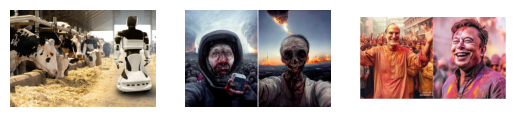

In [16]:
import random
from PIL import Image
ai_image_path_list = list(Path(ai_dir).glob("*.jpg"))
random_ai_image = random.sample(ai_image_path_list, k=3)

i = 1
for image_path in random_ai_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

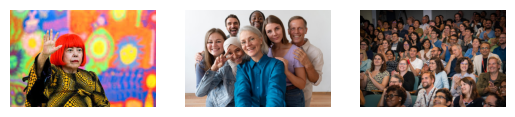

In [17]:
import random
from PIL import Image
real_image_path_list = list(Path(real_dir).glob("*.jpg"))
random_real_image = random.sample(real_image_path_list, k=3)

i = 1
for image_path in random_real_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

In [18]:
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images'.
There are 1 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images/RealArt'.
There are 0 directories and 436 images in '/kaggle/input/ai-generated-images-vs-real-images/RealArt/RealArt'.
There are 1 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData'.
There are 0 directories and 539 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.


In [19]:
new_data_path = Path("kaggle/working/data")
new_data_path.mkdir(parents=True, exist_ok=True)

train_path = new_data_path / "train"
test_path = new_data_path / "test"

os.mkdir(train_path)
os.mkdir(test_path)

train_ai_split = int(len(ai_image_path_list) * 0.8)
train_real_split = int(len(real_image_path_list) * 0.8)

train_ai_img = random.sample(ai_image_path_list, k=train_ai_split)
train_real_img = random.sample(real_image_path_list, k=train_real_split)

test_ai_img = []
test_real_img = []

for ai_img in ai_image_path_list:
    if ai_img not in train_ai_img:
        test_ai_img.append(ai_img)
    
for real_img in real_image_path_list:
    if real_img not in train_real_img:
        test_real_img.append(real_img)
print(f"ai_image_path_list: {len(ai_image_path_list)}")
print(f"real_image_path_list: {len(real_image_path_list)}")
print(f"train_ai_img: {len(train_ai_img)}")
print(f"train_real_img: {len(train_real_img)}")
print(f"test_ai_img: {len(test_ai_img)}")
print(f"test_real_img: {len(test_real_img)}")

ai_image_path_list: 385
real_image_path_list: 378
train_ai_img: 308
train_real_img: 302
test_ai_img: 77
test_real_img: 76


In [20]:
train_ai_path = train_path / "AiArt"
train_real_path = train_path / "RealArt"
test_ai_path = test_path / "AiArt"
test_real_path = test_path / "RealArt"

os.mkdir(train_ai_path)
os.mkdir(train_real_path)
os.mkdir(test_ai_path)
os.mkdir(test_real_path)

In [21]:
import shutil
for img in train_ai_img:
    shutil.copy(img, train_ai_path)
for img in train_real_img:
    shutil.copy(img, train_real_path)
for img in test_ai_img:
    shutil.copy(img, test_ai_path)
for img in test_real_img:
    shutil.copy(img, test_real_path)

In [22]:
for dirpaths, dirnames, filenames in os.walk(new_data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 2 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 0 directories and 308 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 0 directories and 302 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 2 directories and 0 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 0 directories and 77 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.
There are 0 directories and 76 images in '/kaggle/input/ai-generated-images-vs-real-images/AiArtData/AiArtData'.


In [25]:
weights = torchvision.models.ResNet152_Weights.DEFAULT
weights

ResNet152_Weights.IMAGENET1K_V2

In [26]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [27]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                 transform=auto_transforms)
test_data = datasets.ImageFolder(root=test_path,
                                transform=auto_transforms)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 610
    Root location: kaggle/working/data/train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 153
    Root location: kaggle/working/data/test
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )


In [28]:
class_names = train_data.classes
class_names

['AiArt', 'RealArt']

In [17]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[-0.9192, -0.9192, -0.8164,  ..., -0.5938, -0.5424, -0.6794],
         [-1.0733, -1.0219, -0.9705,  ..., -0.4226, -0.4739, -0.6281],
         [-1.0390, -1.0390, -0.9020,  ..., -0.6623, -0.6623, -0.6965],
         ...,
         [-0.9192, -1.1760, -1.1418,  ..., -0.6281, -0.6965, -0.8335],
         [-1.0733, -0.9534, -1.1075,  ..., -0.3883, -0.3541, -0.4226],
         [-1.1589, -0.7308, -0.9534,  ..., -0.1657, -0.1828, -0.2684]],

        [[-1.2129, -1.1779, -1.1078,  ..., -0.7052, -0.6527, -0.7752],
         [-1.3529, -1.2829, -1.3004,  ..., -0.5476, -0.6001, -0.7577],
         [-1.3004, -1.3179, -1.2479,  ..., -0.8102, -0.8277, -0.8452],
         ...,
         [-1.0903, -1.3354, -1.3704,  ..., -1.0553, -1.0903, -1.2129],
         [-1.2654, -1.1253, -1.3354,  ..., -0.8627, -0.8627, -0.9153],
         [-1.3179, -0.9153, -1.1779,  ..., -0.6527, -0.7402, -0.8102]],

        [[-1.3513, -1.2990, -1.2119,  ..., -0.6193, -0.5844, -0.6890],
         [-1.3861, -1.3164, -1.

In [18]:
from torch.utils.data import DataLoader
num_workers = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=32,
                             num_workers=num_workers,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=num_workers,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df725303430>,
 <torch.utils.data.dataloader.DataLoader at 0x7df7253016f0>)

In [23]:
model = torchvision.models.resnet152(weights="IMAGENET1K_V2").to(device)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:01<00:00, 136MB/s]  


In [25]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [28]:
for param in model.conv1.parameters():
    param.requires_grad = False
for param in model.bn1.parameters():
    param.requires_grad = False
for param in model.layer1.parameters():
    param.requires_grad = False
for param in model.layer2.parameters():
    param.requires_grad = False
for param in model.layer3.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():
    param.requires_grad = False

In [29]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [30]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [64]:
model.fc = nn.Linear(in_features=2048, out_features=1, bias=True).to(device)

In [65]:
model.fc

Linear(in_features=2048, out_features=1, bias=True)

In [66]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [67]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [68]:
!pip install torcheval
import torcheval
from torcheval.metrics import BinaryAccuracy
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor):
    metric = BinaryAccuracy(threshold=0.5)
    metric.update(y_pred, y_true)
    return metric.compute().item()

In [69]:
accuracy_fn(torch.tensor([0, 0, 0, 1]), torch.Tensor([0.2, 0.9, 0.9, 0.9]))

0.5

In [75]:
img, label = next(iter(train_dataloader))
pred = model(img.to(device))
print(pred.squeeze())
print(torch.sigmoid(pred.squeeze()))
pred.squeeze().shape, label.shape

tensor([-0.1984, -0.2514, -0.0359,  0.0234, -0.1015, -0.0905, -0.3906,  0.0081,
         0.0223, -0.1213, -0.2772, -0.1482, -0.2356, -0.1174,  0.0768, -0.0729,
        -0.0608,  0.1213, -0.2754, -0.0572, -0.1173, -0.1715, -0.0089, -0.2859,
        -0.1491, -0.1832, -0.1093,  0.0400, -0.0708, -0.1104,  0.1436, -0.0388],
       device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor([0.4506, 0.4375, 0.4910, 0.5058, 0.4746, 0.4774, 0.4036, 0.5020, 0.5056,
        0.4697, 0.4311, 0.4630, 0.4414, 0.4707, 0.5192, 0.4818, 0.4848, 0.5303,
        0.4316, 0.4857, 0.4707, 0.4572, 0.4978, 0.4290, 0.4628, 0.4543, 0.4727,
        0.5100, 0.4823, 0.4724, 0.5358, 0.4903], device='cuda:0',
       grad_fn=<SigmoidBackward0>)


(torch.Size([32]), torch.Size([32]))

In [85]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X).squeeze()
        
        loss = loss_fn(y_pred, y.float())
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(y_pred))
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    
    model.eval()
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            test_pred_logits = model(X).squeeze()
            
            loss = loss_fn(test_pred_logits, y.float())
            test_loss += loss.item()
            
            test_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(test_pred_logits))
            
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    
    return test_loss, test_acc

In [88]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         loss_fn: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         accuracy_fn,
         epochs: int = 5):
    
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          accuracy_fn=accuracy_fn)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        accuracy_fn=accuracy_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [89]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()

results = train(model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader,
               test_dataloader=test_dataloader,
               epochs=5)

end_time = timer()

print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4644 | train_acc: 0.8297 | test_loss: 0.5448 | test_acc: 0.7440
Epoch: 2 | train_loss: 0.4766 | train_acc: 0.8063 | test_loss: 0.5395 | test_acc: 0.7520
Epoch: 3 | train_loss: 0.4590 | train_acc: 0.8141 | test_loss: 0.5301 | test_acc: 0.7235
Epoch: 4 | train_loss: 0.4546 | train_acc: 0.8094 | test_loss: 0.5268 | test_acc: 0.7440
Epoch: 5 | train_loss: 0.4279 | train_acc: 0.8313 | test_loss: 0.5116 | test_acc: 0.7538
[INFO] Total training time: 64.920 seconds


In [91]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

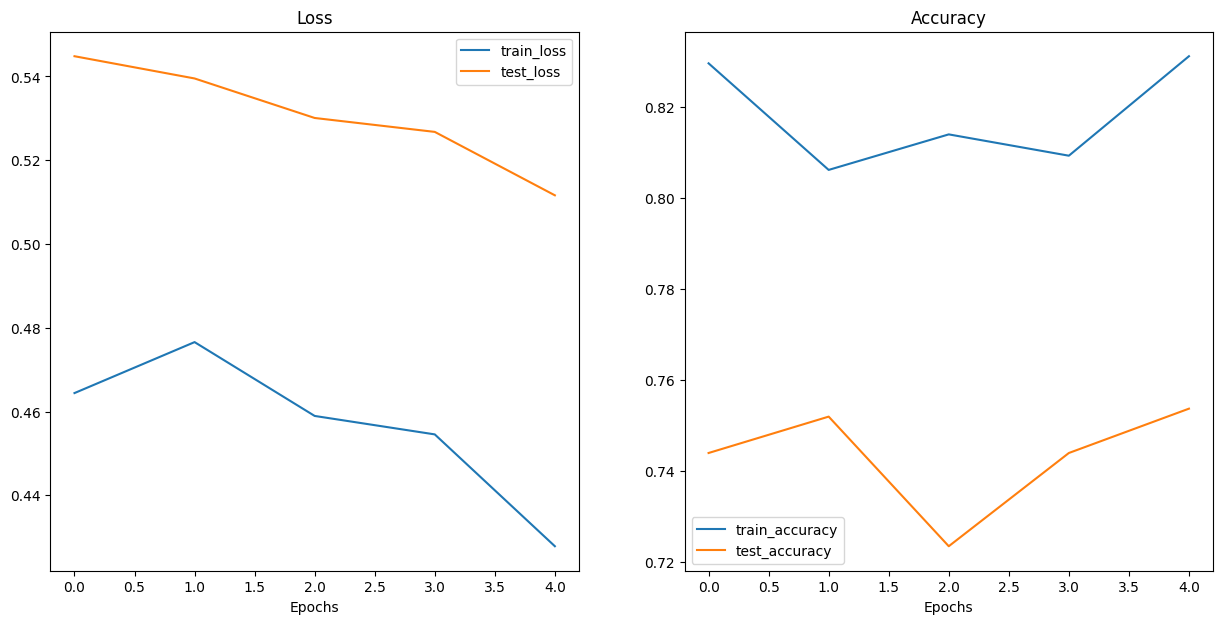

In [92]:
plot_loss_curves(results)

In [94]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()

results_20_epochs = train(model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader,
               test_dataloader=test_dataloader,
               epochs=20)

end_time = timer()

print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1636 | train_acc: 0.9734 | test_loss: 0.5721 | test_acc: 0.7270
Epoch: 2 | train_loss: 0.1999 | train_acc: 0.9547 | test_loss: 0.5632 | test_acc: 0.7235
Epoch: 3 | train_loss: 0.1846 | train_acc: 0.9625 | test_loss: 0.5464 | test_acc: 0.7315
Epoch: 4 | train_loss: 0.1952 | train_acc: 0.9234 | test_loss: 0.5609 | test_acc: 0.7378
Epoch: 5 | train_loss: 0.1805 | train_acc: 0.9703 | test_loss: 0.5470 | test_acc: 0.7520
Epoch: 6 | train_loss: 0.1951 | train_acc: 0.9578 | test_loss: 0.5584 | test_acc: 0.7440
Epoch: 7 | train_loss: 0.1552 | train_acc: 0.9812 | test_loss: 0.5658 | test_acc: 0.7378
Epoch: 8 | train_loss: 0.1646 | train_acc: 0.9750 | test_loss: 0.5750 | test_acc: 0.7253
Epoch: 9 | train_loss: 0.1846 | train_acc: 0.9547 | test_loss: 0.5775 | test_acc: 0.7235
Epoch: 10 | train_loss: 0.1647 | train_acc: 0.9781 | test_loss: 0.5885 | test_acc: 0.7315
Epoch: 11 | train_loss: 0.1598 | train_acc: 0.9875 | test_loss: 0.5726 | test_acc: 0.7332
Epoch: 12 | train_l

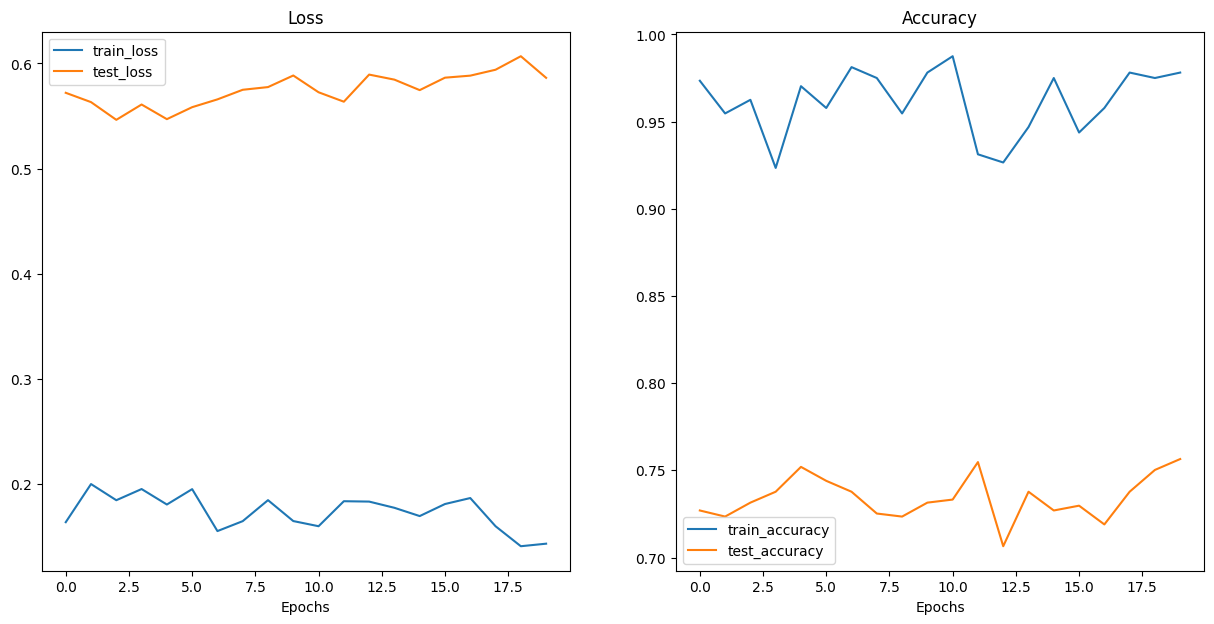

In [95]:
plot_loss_curves(results_20_epochs)

In [97]:
MODEL_PATH = Path("kaggle/working/model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "resnet152_ai_vs_real_img_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(),
          f=MODEL_SAVE_PATH)

In [11]:
import torchvision
import torch
from pathlib import Path
import matplotlib as plt
model = torchvision.models.resnet152(weights="IMAGENET1K_V2")
model.fc = torch.nn.Linear(in_features=2048, out_features=1, bias=True)
model.load_state_dict(torch.load(f="/kaggle/input/resnet152_ai_vs_real_img_model/pytorch/model/1/resnet152_ai_vs_real_img_model.pth", map_location=torch.device("cpu")))
device = "cpu"
model = model.to(device)


In [32]:
from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        label,
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device,
                       ):
    
    
    img = Image.open(image_path)

    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])


    model.to(device)

    model.eval()
    with torch.inference_mode():
      
      transformed_image = image_transform(img).unsqueeze(dim=0)

      target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.sigmoid(target_image_pred).squeeze()
    target_image_pred_label = torch.round(target_image_pred_probs).int()


    plt.figure()
    plt.imshow(img)
    if class_names[target_image_pred_label] == label:
        plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs:.3f} | Label: {label}", c="g")
    else:
        plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs:.3f} | Label: {label}", c="r")
    plt.axis(False);

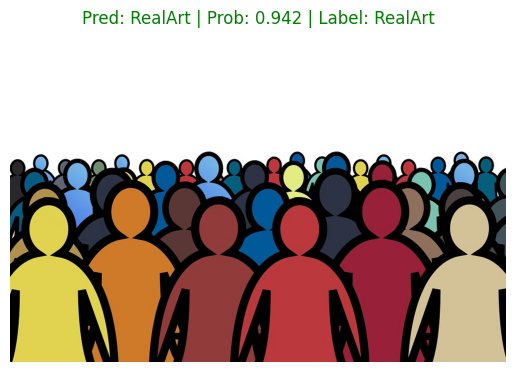

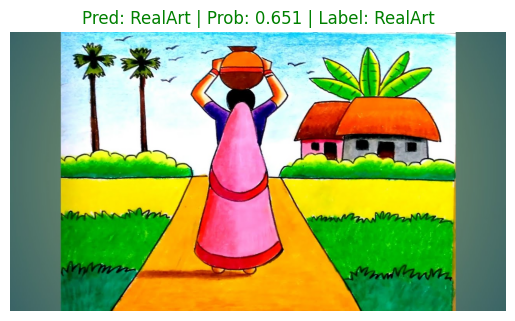

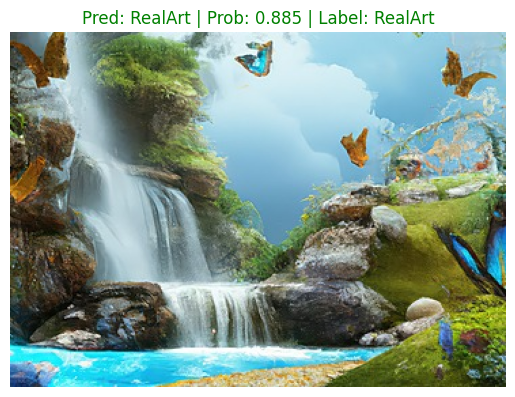

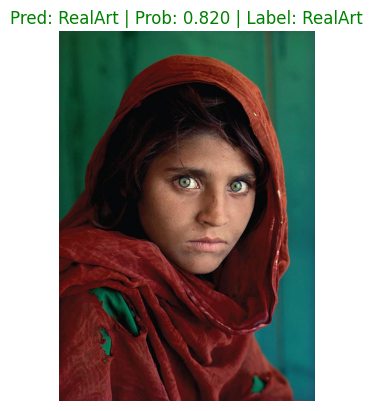

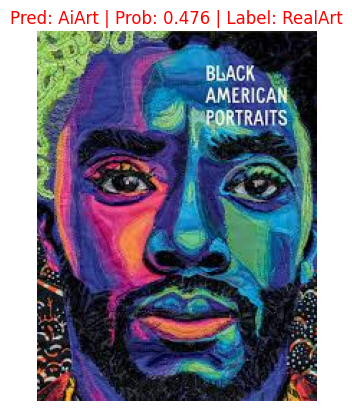

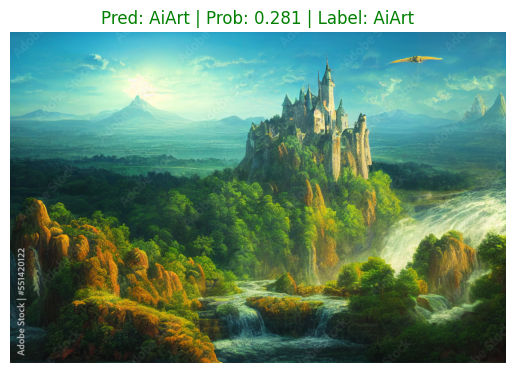

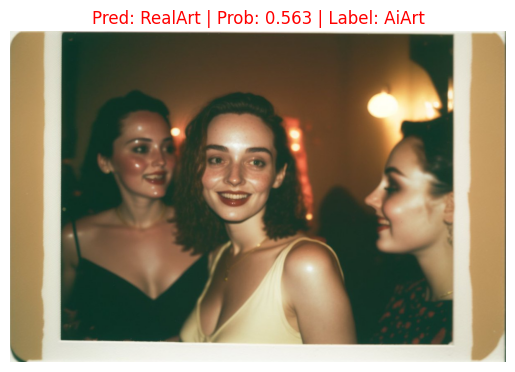

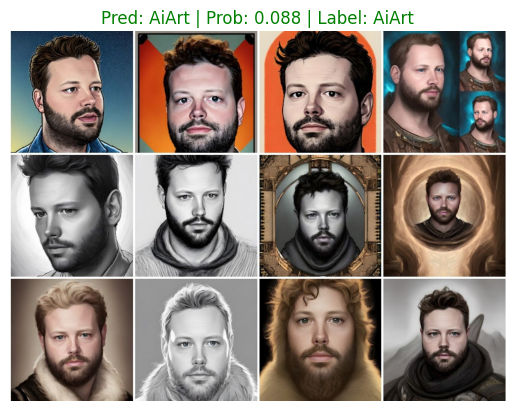

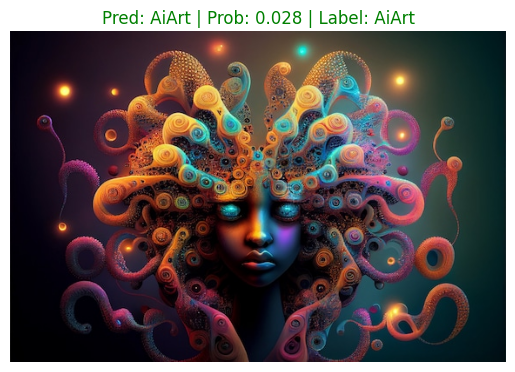

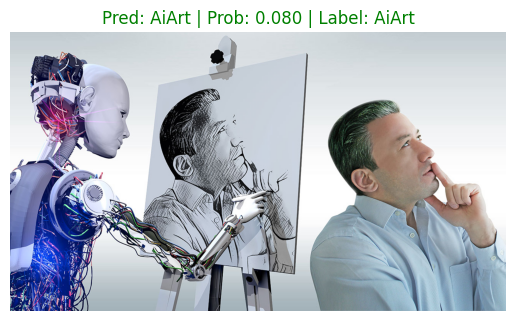

In [33]:
import random
num_images_to_plot = 5
test_real_list = list(Path(test_path).glob("RealArt/*.jpg")) 
test_real_sample = random.sample(population=test_real_list, 
                                       k=num_images_to_plot) 
test_ai_list = list(Path(test_path).glob("AiArt/*.jpg")) 
test_ai_sample = random.sample(population=test_ai_list, 
                                       k=num_images_to_plot) 


for image_path in test_real_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        transform=weights.transforms(),
                        image_size=(224, 224),
                       label="RealArt")
for image_path in test_ai_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        transform=weights.transforms(),
                        image_size=(224, 224),
                       label="AiArt")

In [141]:
test_loss, test_acc = test_step(model, test_dataloader, loss_fn, accuracy_fn)
print(f"Accuracy of model on test data: {test_acc * 100 :.3f}%")

Accuracy of model on test data: 75.650%
